# Chapter 2 - Introduction to Computer Vision

In this chapter we train a full connected neural network to classify Fashion MNIST dataset.

import torch
import torch.nn as nn
immport torch.opim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Load the dataset

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
# Define the model

class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = FashionMNISTModel()

In [4]:
# Accuracy Calculation

def get_accuracy(pred, labels):
    _, predictions = torch.max(pred, 1)
    correct = (predictions == labels).float().sum()
    accuracy = correct / labels.shape[0]
    return accuracy

In [5]:
# Training Loop

loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0
    total_accuracy = 0
    
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        accuracy = get_accuracy(pred, y)
        
        # Accumulate totals
        total_loss += loss.item()
        total_accuracy += accuracy.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            current = batch * len(X)
            avg_loss = total_loss / (batch + 1)
            avg_accuracy = total_accuracy / (batch + 1) * 100
            print(f"Batch {batch}, Loss: {avg_loss:>7f}, Accuracy: {avg_accuracy:>0.2f}% [{current:>5d}/{size:>5d}]")

    if avg_accuracy >= 95:
        print("Reached 95% accuracy, stopping training.")
        return True

In [6]:
# Train

epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    should_stop = train(train_loader, model, loss_function, optimizer)
    if should_stop:
        break
    print("\n")
print("Done!")

Epoch 1
-------------------------------
Batch 0, Loss: 2.274945, Accuracy: 15.62% [    0/60000]
Batch 100, Loss: 0.964410, Accuracy: 67.91% [ 6400/60000]
Batch 200, Loss: 0.792410, Accuracy: 73.34% [12800/60000]
Batch 300, Loss: 0.704631, Accuracy: 76.14% [19200/60000]
Batch 400, Loss: 0.655057, Accuracy: 77.74% [25600/60000]
Batch 500, Loss: 0.619781, Accuracy: 78.90% [32000/60000]
Batch 600, Loss: 0.597841, Accuracy: 79.57% [38400/60000]
Batch 700, Loss: 0.578714, Accuracy: 80.19% [44800/60000]
Batch 800, Loss: 0.561106, Accuracy: 80.67% [51200/60000]
Batch 900, Loss: 0.548462, Accuracy: 81.11% [57600/60000]


Epoch 2
-------------------------------
Batch 0, Loss: 0.372117, Accuracy: 87.50% [    0/60000]
Batch 100, Loss: 0.433634, Accuracy: 84.99% [ 6400/60000]
Batch 200, Loss: 0.425313, Accuracy: 84.83% [12800/60000]
Batch 300, Loss: 0.420409, Accuracy: 85.15% [19200/60000]
Batch 400, Loss: 0.415066, Accuracy: 85.35% [25600/60000]
Batch 500, Loss: 0.409897, Accuracy: 85.54% [32000/6

In [11]:
# Function to test the model

def test(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_function(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [12]:
# Model Eval
test(test_loader, model)

Test Error: 
 Accuracy: 88.6%, Avg loss: 0.396822 



In [13]:
# Predict single image function

def predict_single_image(image, label, model):
    model.eval()

    image = image.unsqueeze(0)

    with torch.no_grad():
        prediction = model(image)
        print(prediction)
        prediction_label = prediction.argmax(1).item()

    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Predicted: {prediction_label}, Actual: {label}")
    plt.show()

    return prediction_label

tensor([[-2.4826e+01, -3.0134e+01, -2.1924e+01, -2.3928e+01, -1.9757e+01,
         -1.4697e+01, -2.5125e+01, -9.6034e+00, -2.2588e+01, -6.7828e-05]])


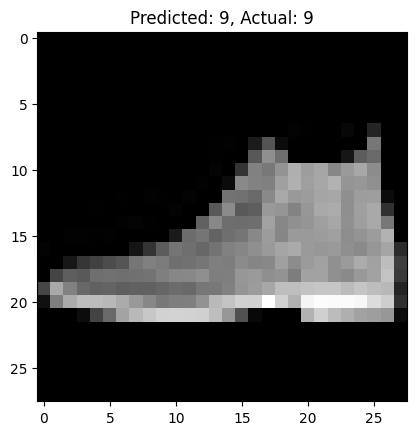

The model predicted 9, and the actual label is 9.


In [14]:
# Test model on single image

image, label = test_dataset[0]
predicted_label = predict_single_image(image, label, model)

print(f"The model predicted {predicted_label}, and the actual label is {label}.")